In [13]:
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [61]:
with open("./temporary_save_new_ranking.pk", 'rb') as f:
    final_results = pk.load(f)
    recorded = pk.load(f)

In [62]:
list(results.keys())[0]

('Sim_reg', 1, 2, 1, 0, 'soft', 'strict')

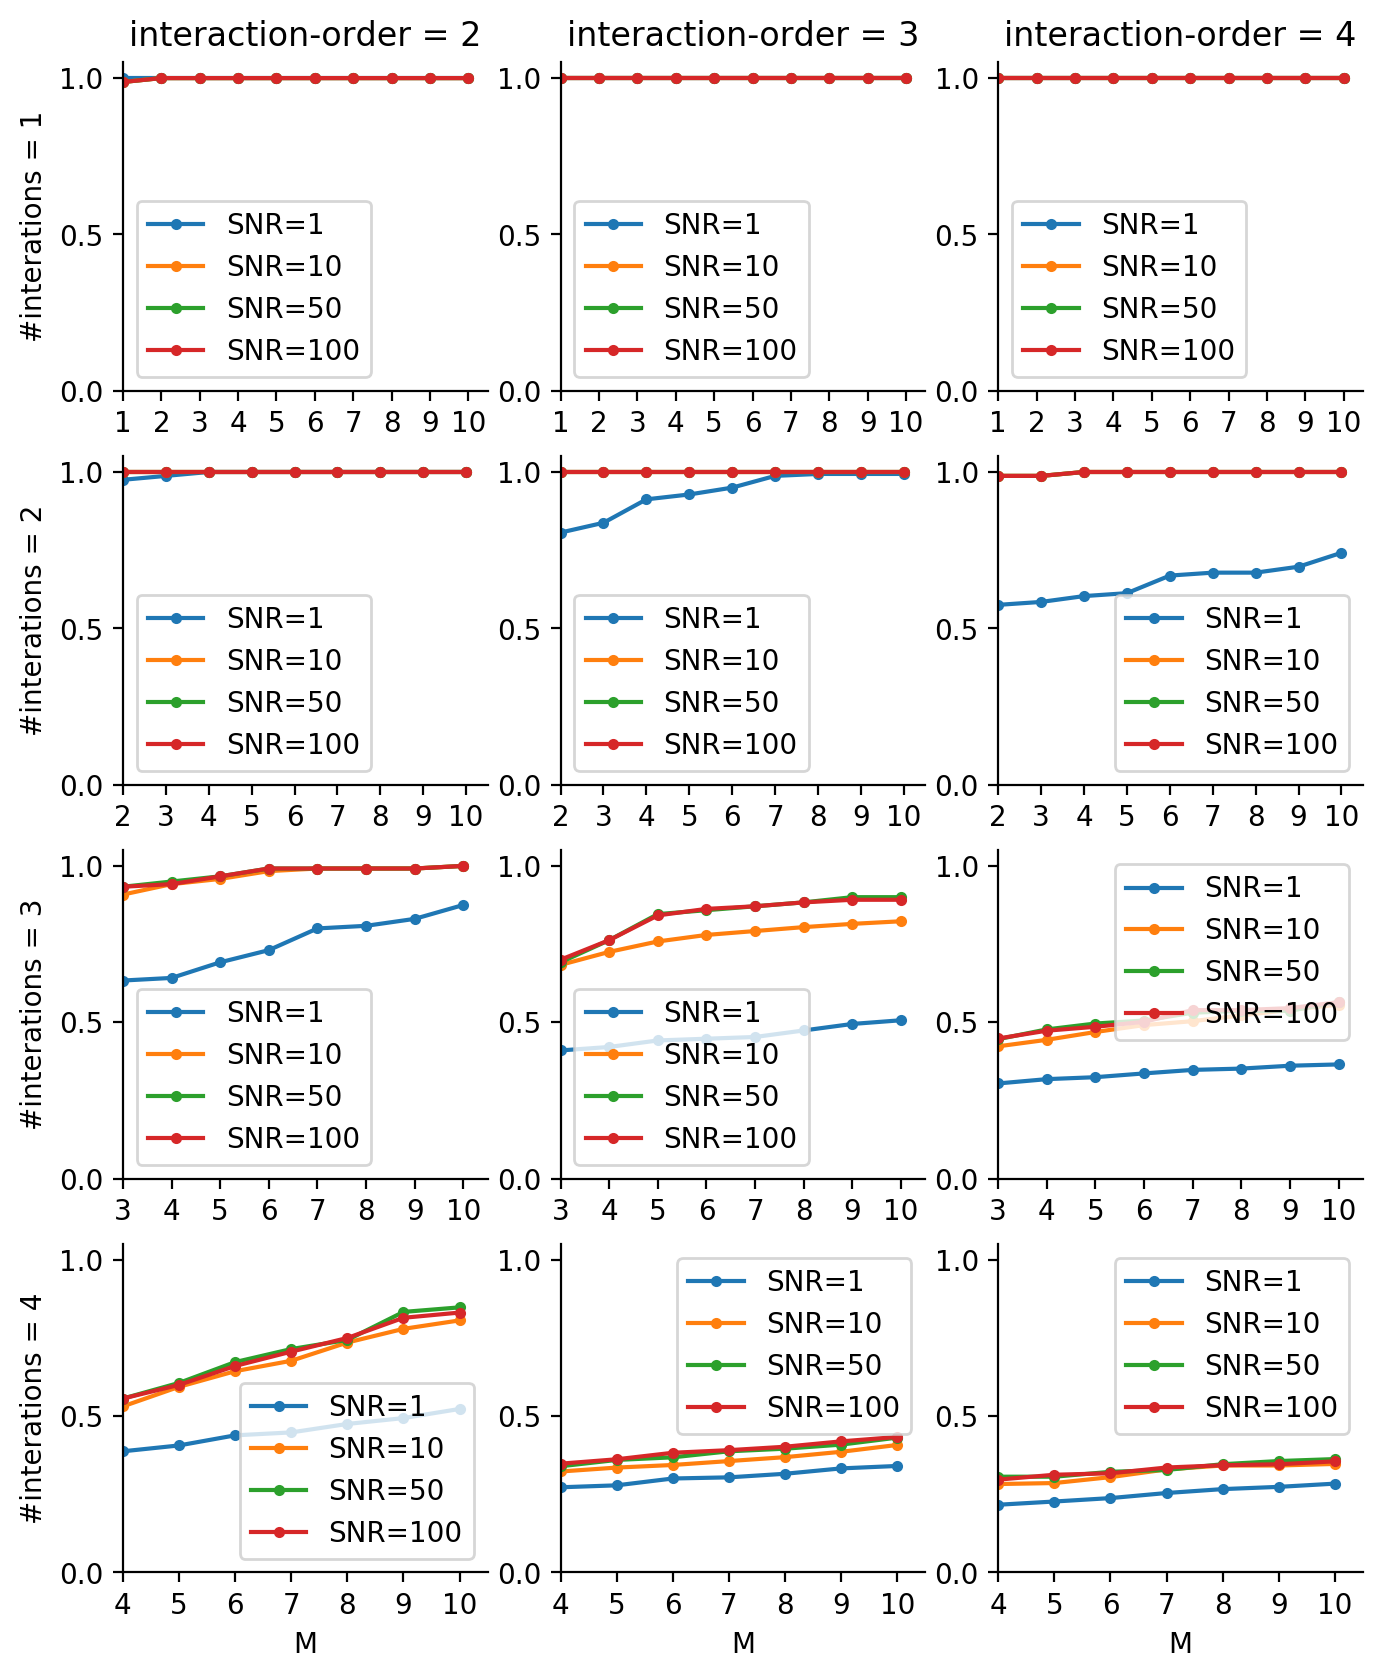

In [73]:
fig, axes = plt.subplots(4,3, figsize=(8,10), sharey=False, dpi=200)
name = 'Sim_reg'
for j, num_interact in enumerate(range(1, 5)):
    for k, order in enumerate(range(2, 5)):
        try:
            for l, SNR in enumerate([1, 10, 50, 100]):
                # depth weighted 
                ax = axes[j][k]
                min_length = np.min([len(v) for x, v in final_results.items() if x[1] == num_interact and x[2] == order and x[3] == SNR and x[5] == 'soft' and x[6] == 'mild'])
                min_length = min(20, min_length)
                min_length = 10
                scores = []
                for x, v in final_results.items():
                    if x[1] == num_interact and x[2] == order and x[3] == SNR and x[5] == 'soft' and x[6] == 'mild':
                        if len(v) < min_length:
                            v = list(v) + [v[-1]] * (min_length - len(v))
                        scores.append(v[:min_length])
                scores = np.array(scores)
                ax.errorbar(
                    np.arange(1, min_length+1),
                    np.nanmean(scores, axis=0),
                    marker='.',
                    #yerr = np.std(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule]), axis=0) / 50 ** .5,
                )

            ax.set_ylim([0,1.05])
            ax.set_xlim([num_interact, min_length+0.5])
            ax.legend(['SNR=1', 'SNR=10', 'SNR=50', 'SNR=100'])
            #ax.set_title(f"Number of interactions {num_interact} with order {order}", fontsize=10)
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            ax.spines["top"].set_visible(False)  
            ax.spines["right"].set_visible(False)
            if k == 0:
                ax.set_ylabel(f"#interations = {num_interact}")
            ax.axes.get_yaxis().set_ticks([0, 0.5, 1])
            if (j == 3):
                ax.set_xlabel("M")
            if j == 0:
                ax.set_title(f"interaction-order = {order}")
        except e:
            print(e)
            pass
# plt.tight_layout()
plt.show()

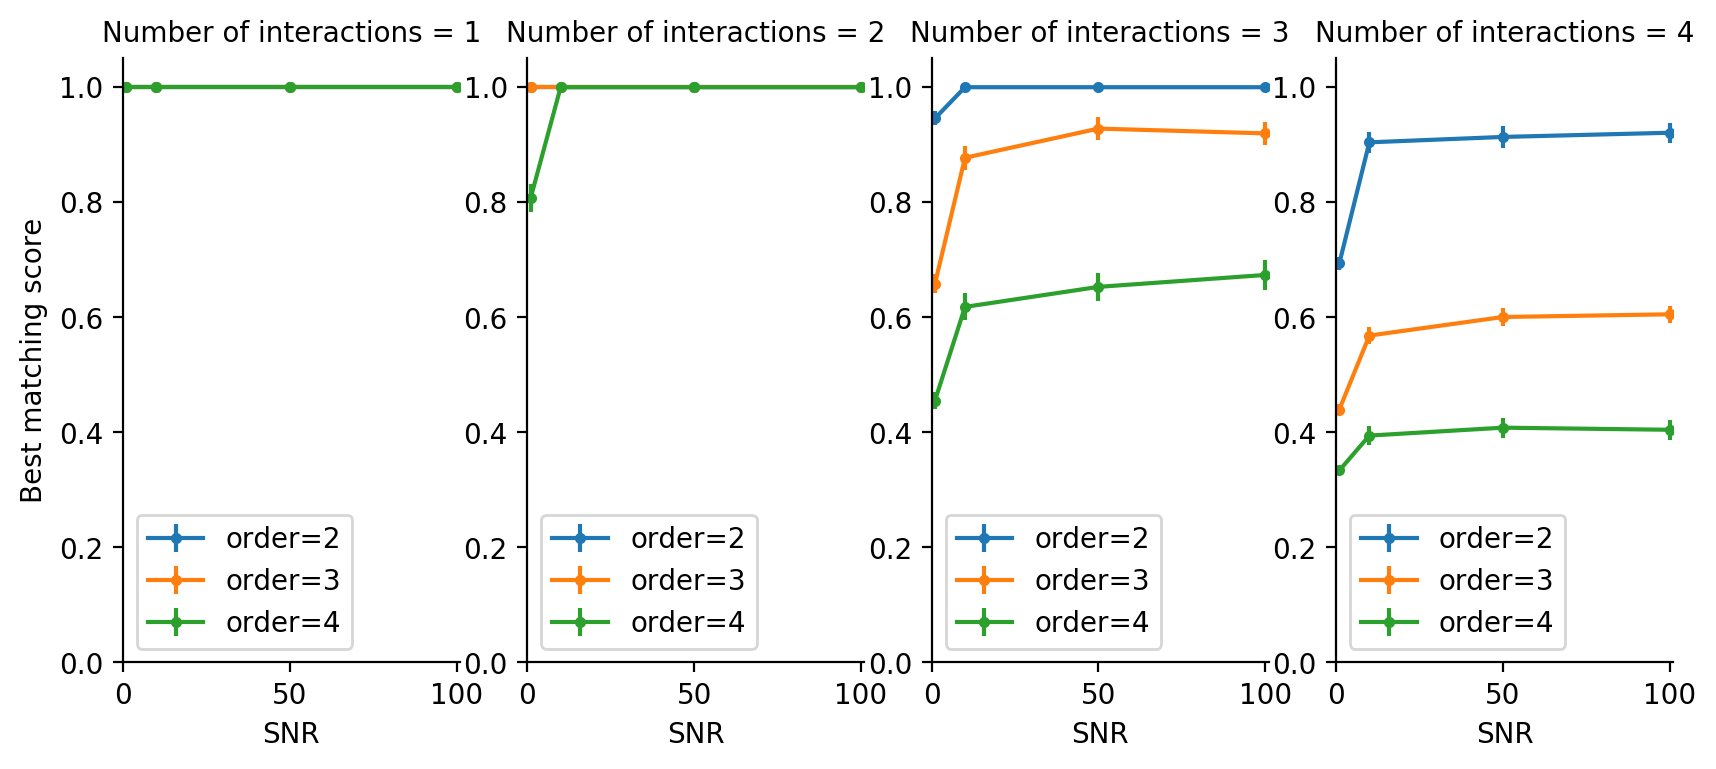

In [46]:
fig, axes = plt.subplots(1,4, figsize=(10,4), sharey=False, dpi=200)
name = 'Sim_reg'
length = 10
for j, num_interact in enumerate(range(1, 5)):
    ax = axes[j]
    for k, order in enumerate(range(2, 5)):
        try:
            scores = []
            std_scores = []
            for l, SNR in enumerate([1, 10, 50, 100]):
                # depth weighted
                different_rounds = []
                for x, v in final_results.items():
                    if x[1] == num_interact and x[2] == order and x[3] == SNR and x[5] == 'soft' and x[6] == 'mild':
                        if len(v) == 0:
                            continue
                        if len(v) < 20:
                            length = len(v) - 1
                        else:
                            length = 19
                        different_rounds.append(v[length])
                scores.append(np.mean(different_rounds))
                std_scores.append(np.std(different_rounds) / len(different_rounds) ** .5)
            ax.errorbar(
                [1, 10, 50, 100],
                scores,
                marker='.',
                yerr = std_scores,
                #yerr = np.std(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule]), axis=0) / 50 ** .5,
            )
        except e:
            print(e)
            pass
    ax.set_ylim([0,1.05])
    ax.set_xlim([0, 101])
    ax.legend(['order=2', 'order=3', 'order=4', 'order=5'])
    ax.set_title(f"Number of interactions = {num_interact}", fontsize=10)
    #ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    if j == 0:
        ax.set_ylabel("Best matching score")
    ax.set_xlabel("SNR")

# plt.tight_layout()
plt.show()